In [109]:
%load_ext autoreload
%autoreload 2

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib notebook

from scipy.signal import find_peaks

import sys
sys.path.append("/Users/marcsauer/PycharmProjects/Swim/src/")
from preprocessing import Preprocessing
import glob

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [125]:
testrun1 = 'Test7'
testrun2 = 'Run_1_1'
pre1 = Preprocessing(testrun1)
pre2 = Preprocessing(testrun2)

Creating "Test7" directory for you!


In [127]:
# Load data
raw_accel1 = pre1.load_data('accel-175130000657-20190405T085617Z.csv', name='raw_accel', header=None)
raw_gyro1 = pre1.load_data('gyro-175130000657-20190405T085618Z.csv', name='raw_gyro', header=None)
raw_magn1 = pre1.load_data('magn-175130000657-20190405T085617Z.csv', name='raw_magn', header=None)

# Load data
raw_accel2 = pre2.load_data('accel-175130000657-20190404T135554Z.csv', name='raw_accel', header=None)
raw_gyro2 = pre2.load_data('gyro-175130000657-20190404T135555Z.csv', name='raw_gyro', header=None)
raw_magn2 = pre2.load_data('magn-175130000657-20190404T135555Z.csv', name='raw_magn', header=None)

In [128]:
# Create data frame with all sensor information
column_names = ['Accel_X', 'Accel_Y', 'Accel_Z', 'Gyro_X', 'Gyro_Y', 'Gyro_Z', 'Magn_X', 'Magn_Y', 'Magn_Z']
raw_data1 = pd.concat([raw_accel1, raw_gyro1, raw_magn1], axis=1, sort=False)
raw_data1.columns = column_names
print(raw_data1.head(5))

raw_data2 = pd.concat([raw_accel2, raw_gyro2, raw_magn2], axis=1, sort=False)
raw_data2.columns = column_names
print(raw_data2.head(5))

    Accel_X   Accel_Y   Accel_Z     Gyro_X  Gyro_Y  Gyro_Z     Magn_X  \
0 -2.713558  0.906912 -9.528560   6.440000    2.45    0.14 -64.950005   
1 -2.818846  1.103131 -9.461558   1.820000    5.67   -0.14 -66.900002   
2 -2.486232  1.064844 -9.310805 -18.620001    3.08   -0.14 -65.250000   
3 -2.598698  1.220383 -9.191160 -13.160000    1.40    1.68 -65.550003   
4 -2.263691  1.773145 -9.928176 -22.820000   -1.96    3.15 -65.400002   

      Magn_Y      Magn_Z  
0 -60.300003  165.300003  
1 -61.800003  165.300003  
2 -61.050003  165.300003  
3 -60.600002  164.100006  
4 -61.650002  165.450012  
    Accel_X   Accel_Y   Accel_Z  Gyro_X  Gyro_Y  Gyro_Z     Magn_X     Magn_Y  \
0 -2.431195 -0.406794 -9.313198   -0.14   -0.35    0.91 -66.300003 -62.400002   
1 -2.385729 -0.186647 -9.545310   -2.73   -0.98    0.07 -66.300003 -61.950001   
2 -2.376158 -0.253648 -9.344306    0.42   -0.91    0.14 -66.450005 -61.950001   
3 -2.529304 -0.325435 -9.545310   -2.38   -2.38    1.47 -67.950005 -62.5500

<IPython.core.display.Javascript object>


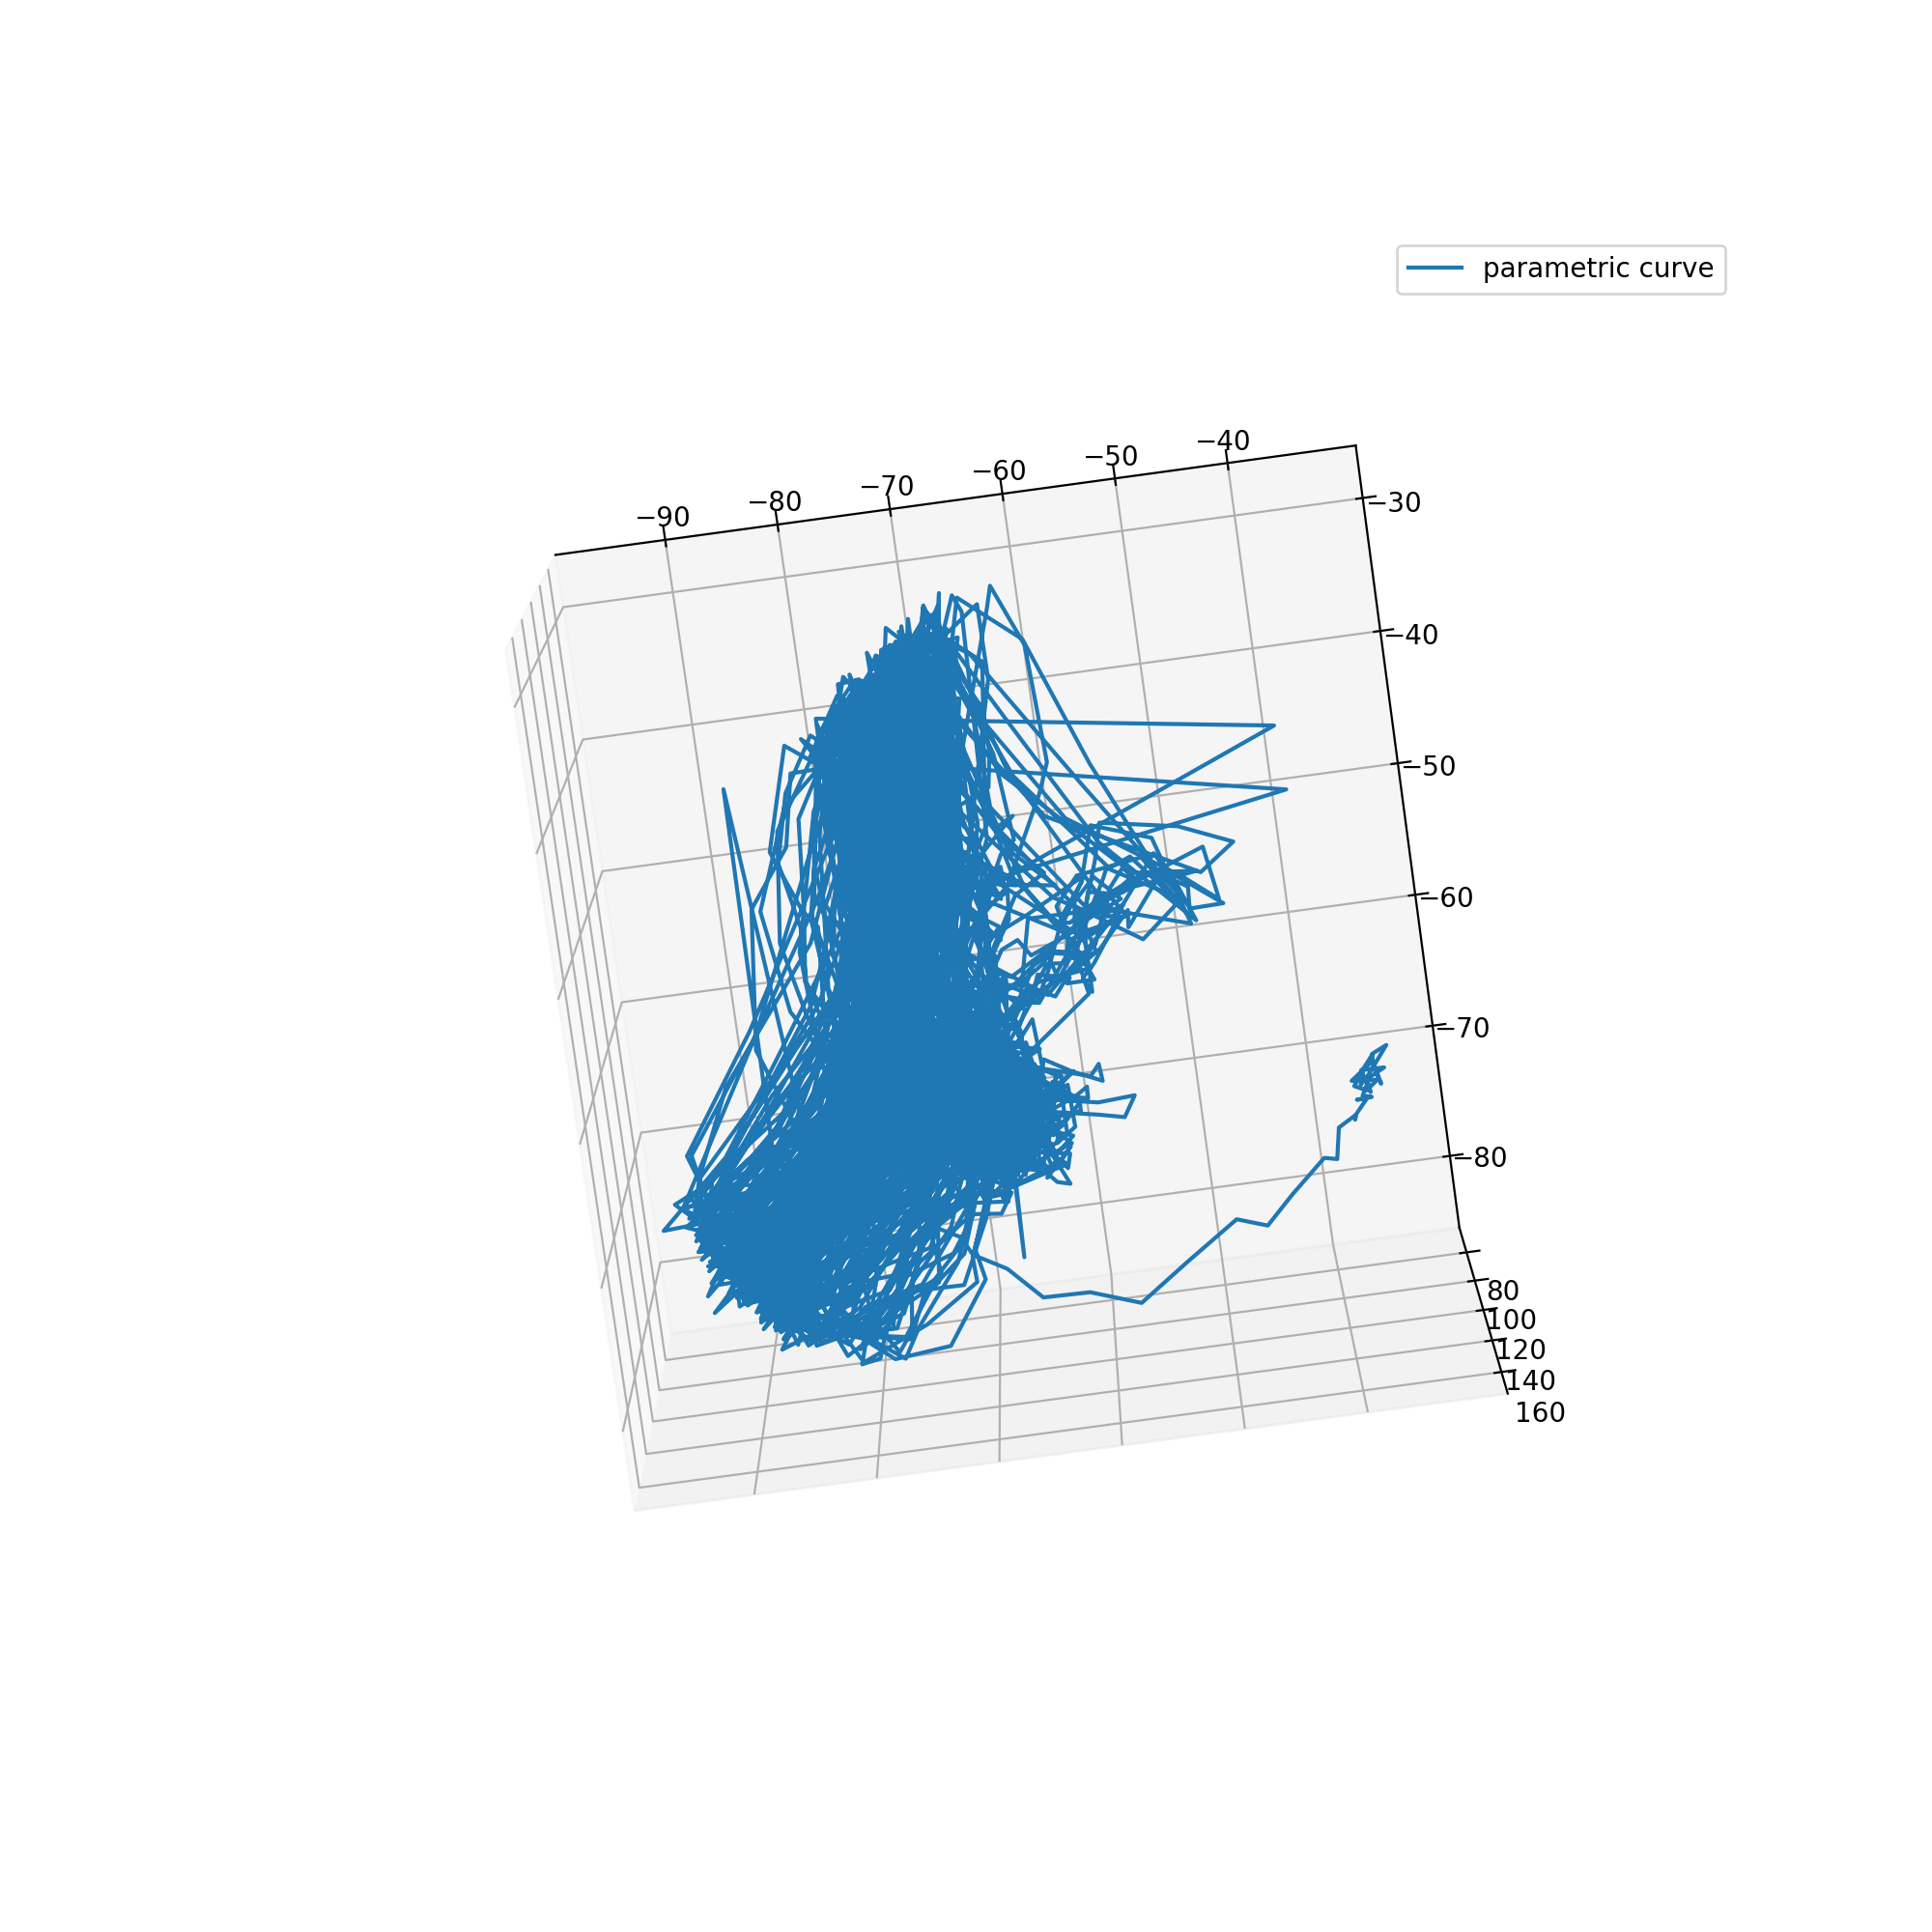

In [24]:
# Plot data (13 Hz)
fig = plt.figure(10, figsize= (10, 10))
ax = fig.add_subplot(111, projection='3d')
ax.plot(raw_data1['Magn_X'], raw_data1['Magn_Y'], raw_data1['Magn_Z'], label='parametric curve')
ax.legend()
plt.show()

In [23]:
# Plot data (13 Hz)
fig = plt.figure(10, figsize= (10, 10))
ax = fig.add_subplot(111, projection='3d')
ax.plot(raw_data2['Magn_X'], raw_data2['Magn_Y'], raw_data2['Magn_Z'], label='parametric curve')
ax.legend()
plt.show()

<IPython.core.display.Javascript object>


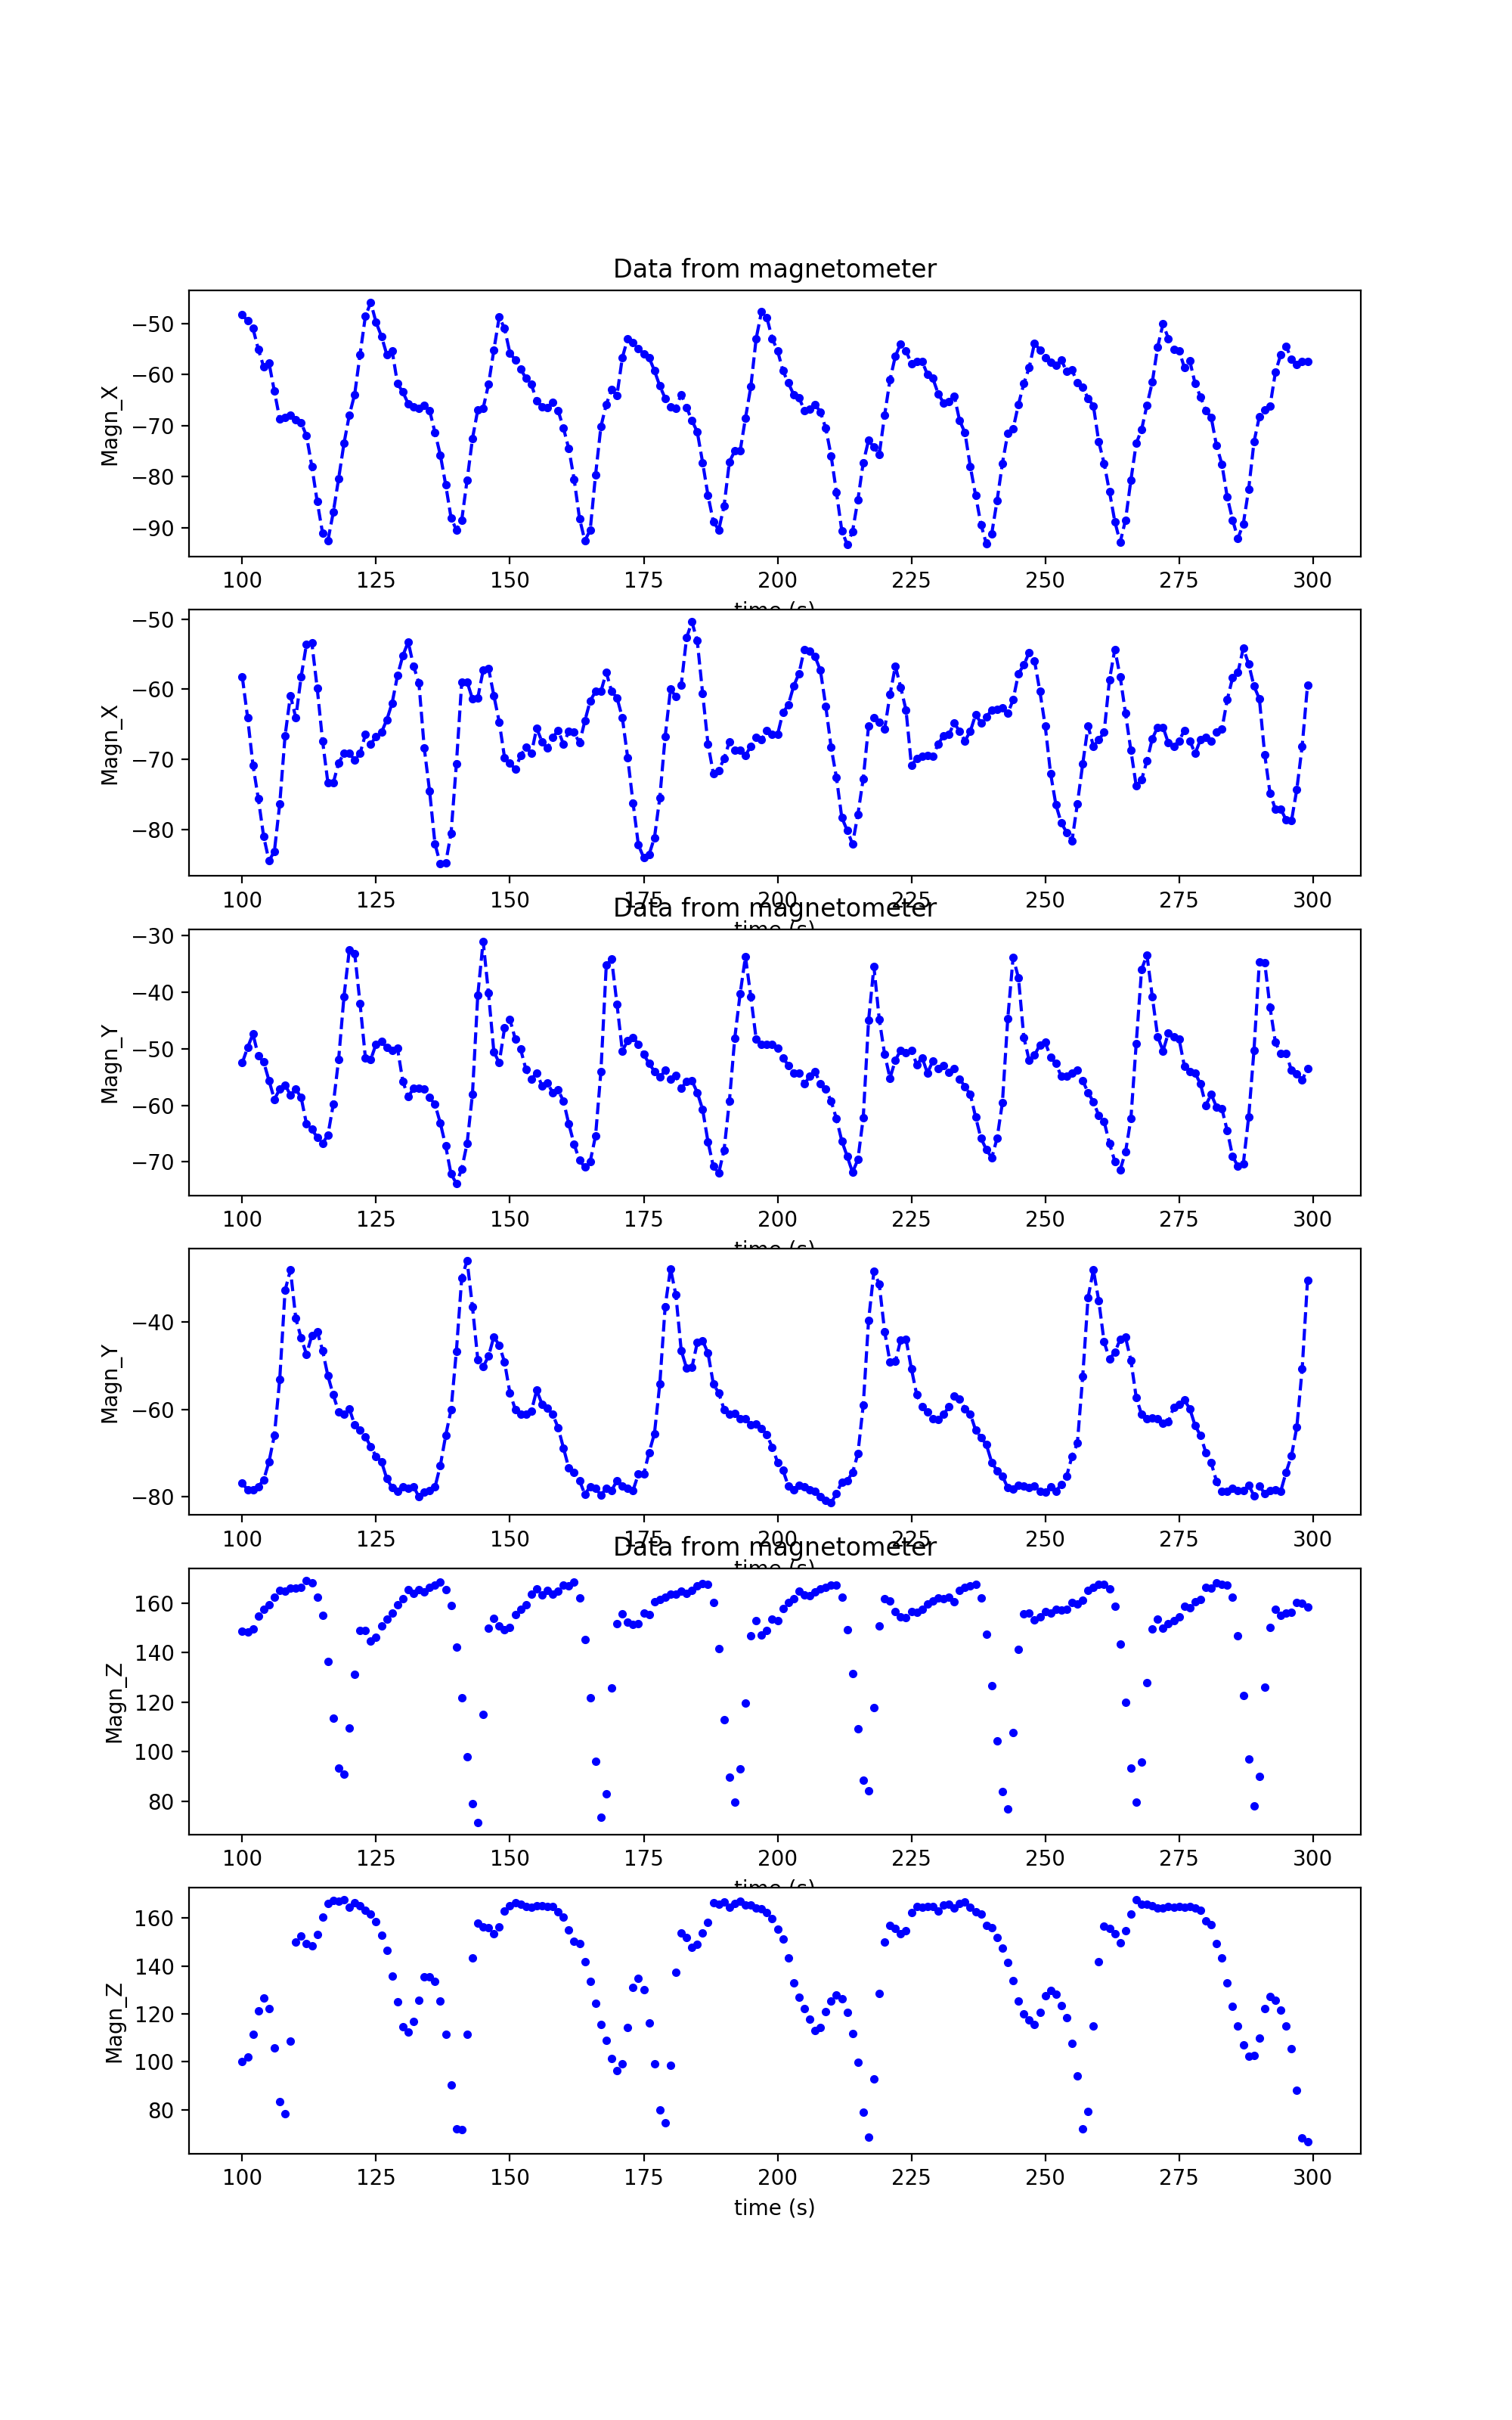

[Text(0, 0.5, 'Magn_Z'), Text(0.5, 0, 'time (s)')]

In [36]:
# Create plots of magnetometer data
fig, (ax1, ax2, ax3, ax4, ax5, ax6) = plt.subplots(6, sharey=False, figsize=(10, 16))

ax1.plot(raw_data1[100:300].index, raw_data1[100:300]['Magn_X'], 'b.--')
ax1.set(title='Data from magnetometer', xlabel='time (s)', ylabel='Magn_X')

ax2.plot(raw_data2[100:300].index, raw_data2[100:300]['Magn_X'],'b.--')
ax2.set(xlabel='time (s)', ylabel='Magn_X')

ax3.plot(raw_data1[100:300].index, raw_data1[100:300]['Magn_Y'], 'b.--')
ax3.set(title='Data from magnetometer', xlabel='time (s)', ylabel='Magn_Y')

ax4.plot(raw_data2[100:300].index, raw_data2[100:300]['Magn_Y'],'b.--')
ax4.set(xlabel='time (s)', ylabel='Magn_Y')

ax5.plot(raw_data1[100:300].index, raw_data1[100:300]['Magn_Z'], 'b.')
ax5.set(title='Data from magnetometer', xlabel='time (s)', ylabel='Magn_Z')

ax6.plot(raw_data2[100:300].index, raw_data2[100:300]['Magn_Z'],'b.')
ax6.set(xlabel='time (s)', ylabel='Magn_Z')

In [108]:
pd.Series(raw_data1['Magn_Z']).min()

64.200005

In [110]:
find_peaks(raw_data1['Magn_Z'], distance=40)

(array([  40,  112,  162,  237,  282,  334,  387,  435,  503,  587,  663,
         714,  768,  846,  925, 1005, 1046, 1086, 1139, 1192, 1244, 1324,
        1407, 1467, 1527, 1572, 1615, 1675, 1720, 1793, 1854, 1916, 1959,
        1999, 2055, 2102, 2163, 2210, 2257, 2329, 2401, 2448, 2493, 2554,
        2630, 2709, 2756, 2801, 2887, 2973, 3035, 3098, 3159, 3200, 3254,
        3316, 3360, 3438, 3482, 3526, 3571, 3618, 3680, 3746, 3803, 3843,
        3892, 3933, 3984, 4028]), {})

<IPython.core.display.Javascript object>


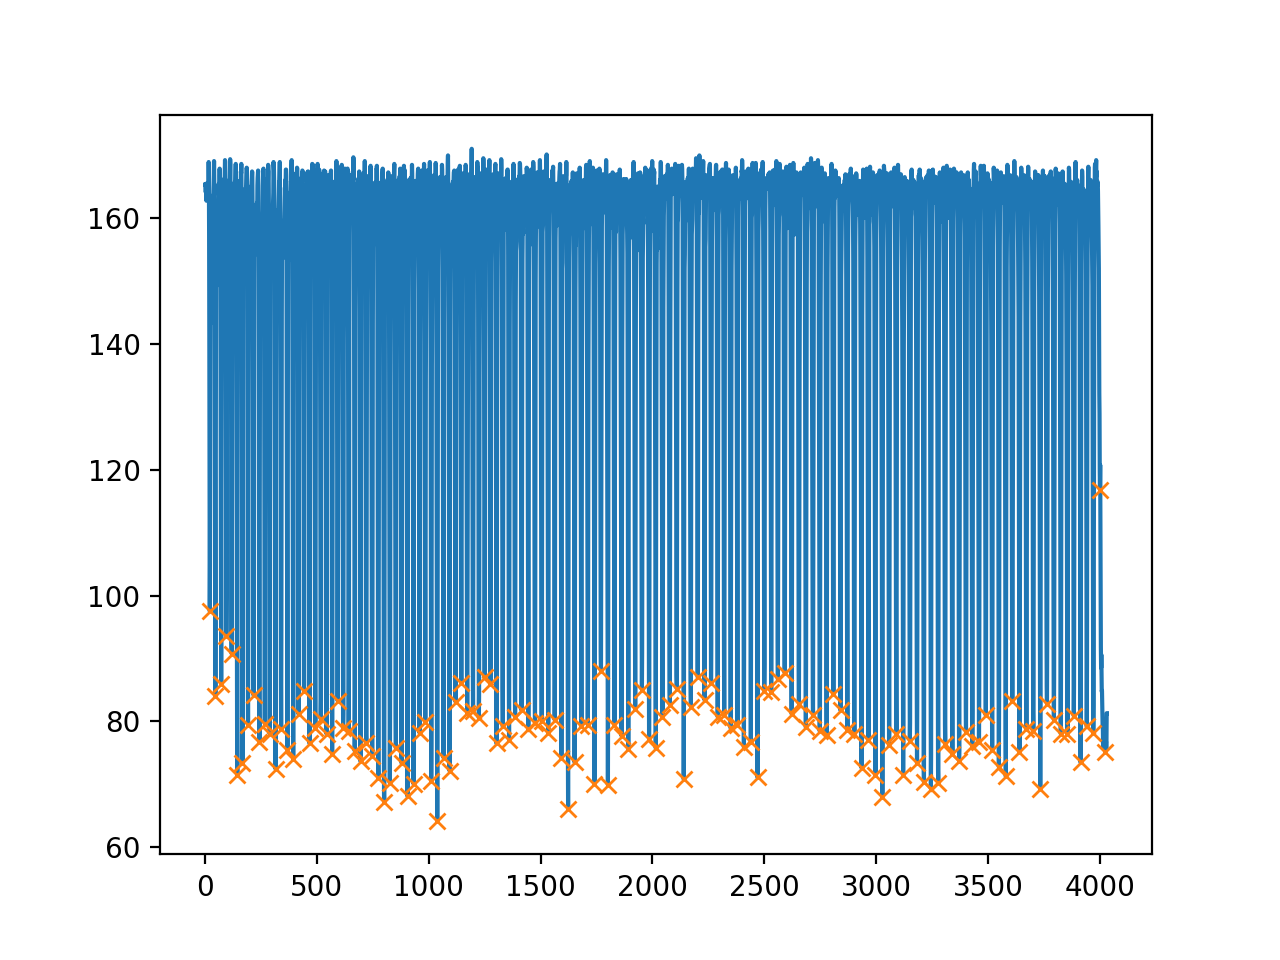

In [122]:
peaks, _ = (find_peaks(raw_data1['Magn_Z']*(-1), distance=20))
minima = np.diff(peaks)
plt.plot(raw_data1['Magn_Z'])
plt.plot(peaks, raw_data1['Magn_Z'][peaks], "x")
plt.show()

In [120]:
minima

array([25, 26, 23, 24, 25, 23, 25, 25, 26, 24, 22, 26, 25, 28, 26, 24, 24,
       25, 26, 24, 26, 25, 25, 24, 25, 27, 26, 26, 26, 28, 26, 25, 27, 26,
       26, 27, 27, 25, 27, 27, 28, 27, 27, 26, 26, 26, 26, 26, 26, 27, 28,
       28, 27, 29, 30, 30, 30, 29, 29, 30, 30, 29, 30, 29, 30, 29, 31, 29,
       32, 30, 31, 30, 32, 30, 30, 33, 31, 31, 32, 31, 30, 29, 30, 29, 29,
       30, 29, 31, 30, 30, 31, 30, 30, 32, 32, 31, 32, 30, 31, 30, 32, 31,
       31, 32, 31, 31, 31, 30, 33, 30, 30, 32, 31, 31, 33, 31, 32, 30, 31,
       28, 30, 30, 29, 30, 31, 29, 32, 31, 31, 31, 30, 31, 31, 29, 29, 30,
       28, 29, 30, 23])

In [123]:
peaks

array([  21,   46,   72,   95,  119,  144,  167,  192,  217,  243,  267,
        289,  315,  340,  368,  394,  418,  442,  467,  493,  517,  543,
        568,  593,  617,  642,  669,  695,  721,  747,  775,  801,  826,
        853,  879,  905,  932,  959,  984, 1011, 1038, 1066, 1093, 1120,
       1146, 1172, 1198, 1224, 1250, 1276, 1303, 1331, 1359, 1386, 1415,
       1445, 1475, 1505, 1534, 1563, 1593, 1623, 1652, 1682, 1711, 1741,
       1770, 1801, 1830, 1862, 1892, 1923, 1953, 1985, 2015, 2045, 2078,
       2109, 2140, 2172, 2203, 2233, 2262, 2292, 2321, 2350, 2380, 2409,
       2440, 2470, 2500, 2531, 2561, 2591, 2623, 2655, 2686, 2718, 2748,
       2779, 2809, 2841, 2872, 2903, 2935, 2966, 2997, 3028, 3058, 3091,
       3121, 3151, 3183, 3214, 3245, 3278, 3309, 3341, 3371, 3402, 3430,
       3460, 3490, 3519, 3549, 3580, 3609, 3641, 3672, 3703, 3734, 3764,
       3795, 3826, 3855, 3884, 3914, 3942, 3971, 4001, 4024])

In [131]:
def single_stroke(raw_data, testrun, save_data=False):
    stroke_cut, _ = (find_peaks(raw_data['Magn_Z']*(-1), distance=20))
    # Lenght of single strokes
    stroke_length = np.diff(peaks)
    if np.var(stroke_length) < 10:
        print('Nice cut (low variance)')
    
    # Create list of data frames
    stroke_cut_mod = [-1] + stroke_cut
    list_of_dfs = [raw_data.iloc[stroke_cut_mod[n]+1:stroke_cut_mod[n+1]+1] for n in range(len(stroke_cut_mod)-1)]
    
    # Save single strokes to csv
    if save_data == True:
        k = 1
        for i in range(0, len(list_of_dfs)):
            pd.DataFrame(list_of_dfs[i]).to_csv('/Users/marcsauer/PycharmProjects/Swim/data/{}/stroke_{}.csv'.format(testrun, k), index=False)
            k += 1

In [132]:
single_stroke(raw_data1, testrun1, save_data=True)

Nice cut (low variance)


In [ ]:
condition_0 = '/Users/marcsauer/PycharmProjects/Swim/data/Run_Felix_*/stroke_*.csv'
#condition_1 = '/Users/marcsauer/PycharmProjects/Swim/data/Run_1_*/stroke_*.csv'

In [ ]:
def feature_dataframe(condition):
    '''Creating features from single stroke and merge into new data frame'''
    Magn_X_mean = []
    Magn_X_min = []
    Magn_X_max = []
    Magn_Y_mean = []
    Magn_Y_min = []
    Magn_Y_max = []
    Magn_Z_mean = []
    Magn_Z_min = []
    Magn_Z_max = []
    Gyro_X_max = []
    Gyro_X_mean = []
    Gyro_X_min = []
    Gyro_Y_mean = []
    Gyro_Y_min = []
    Gyro_Y_max = []
    Gyro_Z_mean = []
    Gyro_Z_min = []
    Gyro_Z_max = []
    Accel_X_max = []
    Accel_X_mean = []
    Accel_X_min = []
    Accel_Y_mean = []
    Accel_Y_min = []
    Accel_Y_max = []
    Accel_Z_mean = []
    Accel_Z_min = []
    Accel_Z_max = []
    
    # Load data
    for file in glob.glob(condition):
        single_stroke = pd.read_csv(file)
        
    # Feature engineering
        # Magn_X_mean
        single_stroke_magn_x_mean = single_stroke["Magn_X"].mean()
        Magn_X_mean.append(single_stroke_magn_x_mean)
        
        # Magn_X_min
        single_stroke_magn_x_min = single_stroke["Magn_X"].min()
        Magn_X_min.append(single_stroke_magn_x_min)
        
        # Magn_X_max
        single_stroke_magn_x_max = single_stroke["Magn_X"].max()
        Magn_X_max.append(single_stroke_magn_x_max)
        
        # Magn_Y_mean
        single_stroke_magn_y_mean = single_stroke["Magn_Y"].mean()
        Magn_Y_mean.append(single_stroke_magn_y_mean)
        
        # Magn_Y_min
        single_stroke_magn_y_min = single_stroke["Magn_Y"].min()
        Magn_Y_min.append(single_stroke_magn_y_min)
        
        # Magn_Y_max
        single_stroke_magn_y_max = single_stroke["Magn_Y"].max()
        Magn_Y_max.append(single_stroke_magn_y_max)
        
        # Magn_Z_mean
        single_stroke_magn_z_mean = single_stroke["Magn_Z"].mean()
        Magn_Z_mean.append(single_stroke_magn_z_mean)
        
        # Magn_Z_min
        single_stroke_magn_z_min = single_stroke["Magn_Z"].min()
        Magn_Z_min.append(single_stroke_magn_z_min)
        
        # Magn_Z_max
        single_stroke_magn_z_max = single_stroke["Magn_Z"].max()
        Magn_Z_max.append(single_stroke_magn_z_max)
        
        # Gyro_X_mean
        single_stroke_gyro_x_mean = single_stroke["Gyro_X"].mean()
        Gyro_X_mean.append(single_stroke_gyro_x_mean)
        
        # Gyro_X_min
        single_stroke_gyro_x_min = single_stroke["Gyro_X"].min()
        Gyro_X_min.append(single_stroke_gyro_x_min)
        
        # Gyro_X_max
        single_stroke_gyro_x_max = single_stroke["Gyro_X"].max()
        Gyro_X_max.append(single_stroke_gyro_x_max)
        
        # Gyro_Y_mean
        single_stroke_gyro_y_mean = single_stroke["Gyro_Y"].mean()
        Gyro_Y_mean.append(single_stroke_gyro_y_mean)
        
        # Gyro_Y_min
        single_stroke_gyro_y_min = single_stroke["Gyro_Y"].min()
        Gyro_Y_min.append(single_stroke_gyro_y_min)
        
        # Gyro_Y_max
        single_stroke_gyro_y_max = single_stroke["Gyro_Y"].max()
        Gyro_Y_max.append(single_stroke_gyro_y_max)
        
        # Gyro_Z_mean
        single_stroke_gyro_z_mean = single_stroke["Gyro_Z"].mean()
        Gyro_Z_mean.append(single_stroke_gyro_z_mean)
        
        # Gyro_Z_min
        single_stroke_gyro_z_min = single_stroke["Gyro_Z"].min()
        Gyro_Z_min.append(single_stroke_gyro_z_min)
        
        # Gyro_Z_max
        single_stroke_gyro_z_max = single_stroke["Gyro_Z"].max()
        Gyro_Z_max.append(single_stroke_gyro_z_max)
        
        # Accel_X_mean
        single_stroke_accel_x_mean = single_stroke["Accel_X"].mean()
        Accel_X_mean.append(single_stroke_accel_x_mean)
        
        # Accel_X_min
        single_stroke_accel_x_min = single_stroke["Accel_X"].min()
        Accel_X_min.append(single_stroke_accel_x_min)
        
        # Accel_X_max
        single_stroke_accel_x_max = single_stroke["Accel_X"].max()
        Accel_X_max.append(single_stroke_accel_x_max)
        
        # Accel_Y_mean
        single_stroke_accel_y_mean = single_stroke["Accel_Y"].mean()
        Accel_Y_mean.append(single_stroke_accel_y_mean)
        
        # Accel_Y_min
        single_stroke_accel_y_min = single_stroke["Accel_Y"].min()
        Accel_Y_min.append(single_stroke_accel_y_min)
        
        # Accel_Y_max
        single_stroke_accel_y_max = single_stroke["Accel_Y"].max()
        Accel_Y_max.append(single_stroke_accel_y_max)
        
        # Accel_Z_mean
        single_stroke_accel_z_mean = single_stroke["Accel_Z"].mean()
        Accel_Z_mean.append(single_stroke_accel_z_mean)
        
        # Accel_Z_min
        single_stroke_accel_z_min = single_stroke["Accel_Z"].min()
        Accel_Z_min.append(single_stroke_accel_z_min)
        
        # Accel_Z_max
        single_stroke_accel_z_max = single_stroke["Accel_Z"].max()
        Accel_Z_max.append(single_stroke_accel_z_max)
        
    # Create new data frame
    feature_dataframe = pd.DataFrame({
                                    'Magn_X_mean':Magn_X_mean, 'Magn_X_min':Magn_X_min, 'Magn_X_max':Magn_X_max, 
                                    'Magn_Y_mean':Magn_Y_mean, 'Magn_Y_min':Magn_Y_min, 'Magn_Y_max':Magn_Y_max,
                                    'Magn_Z_mean':Magn_Z_mean, 'Magn_Z_min':Magn_Z_min, 'Magn_Z_max':Magn_Z_max,
                                    'Gyro_X_mean':Gyro_X_mean, 'Gyro_X_min':Gyro_X_min, 'Gyro_X_max':Gyro_X_max,
                                    'Gyro_Y_mean':Gyro_Y_mean, 'Gyro_Y_min':Gyro_Y_min, 'Gyro_Y_max':Gyro_Y_max,
                                    'Gyro_Z_mean':Gyro_Z_mean, 'Gyro_Z_min':Gyro_Z_min, 'Gyro_Z_max':Gyro_Z_max,
                                    'Accel_X_mean':Accel_X_mean, 'Accel_X_min':Accel_X_min, 'Accel_X_max':Accel_X_max, 
                                    'Accel_Y_mean':Accel_Y_mean, 'Accel_Y_min':Accel_Y_min, 'Accel_Y_max':Accel_Y_max,
                                    'Accel_Z_mean':Accel_Z_mean, 'Accel_Z_min':Accel_Z_min, 'Accel_Z_max':Accel_Z_max,
                                     })    

    # Add condition to data frame
    #if condition == condition_0:
    #    feature_dataframe['condition'] = 0
    #elif condition == condition_1:
    #    feature_dataframe['condition'] = 1
    #else:
    #    print('No condition as input') # nicht wirksam
    return feature_dataframe

In [ ]:
df_felix = feature_dataframe(condition_0)